## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [178]:
student_name = "Tracey Tran"
student_id = "47753595"

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

sns.set_theme()

In [184]:
ecommerce = pd.read_csv('/content/drive/MyDrive/BA - Session 1 - 2024/COMP6200/Portfolio 2/cleaned_ecommerce_dataset.csv')
print("The length of the data:", len(ecommerce))

The length of the data: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

1. Rough picture about the data

In [185]:
ecommerce.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [186]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


2. As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the corr() method.

Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import OrdinalEncoder from sklearn.preprocessing (refer to the useful exmaples here)

In [187]:
ord_enc = OrdinalEncoder()

In [188]:
# encode category feature - gender
ecommerce['gender'] = ord_enc.fit_transform(ecommerce[['gender']])
ecommerce[['gender']].head(10)

,gender
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [189]:
# encode category feature - category
ecommerce['category'] = ord_enc.fit_transform(ecommerce[['category']])
ecommerce[['category']].head(10)

,category
0,8.0
1,8.0
2,8.0
3,5.0
4,5.0
5,5.0
6,5.0
7,4.0
8,5.0
9,8.0


In [190]:
# encode category feature - review
ecommerce['review'] = ord_enc.fit_transform(ecommerce[['review']])
ecommerce[['review']].head(10)

,review
0,1618.0
1,1125.0
2,2185.0
3,2243.0
4,1033.0
5,925.0
6,1854.0
7,795.0
8,262.0
9,2643.0


In [191]:
# correlation between helpfulness/gender/category/review and rating
ecommerce_corr = ecommerce[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()
print(ecommerce_corr)

             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000


EXPLAINATION:

'Rating' and 'Category' have the most negative correlated relationship as the corralation is -0.16, followed by the correlation between 'Review','Gender' and 'Rating', at -0.036 and -0.03. Otherwise, 'Helpfulness' has least correlated relationship with 'Rating', with the correlation is -0.007.


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [192]:
ecommerce.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,1618.0,McDonald's,4.0,3.0,1.0,8.0,41,30.74,4
1,4081,72000,1125.0,Taco Bell,1.0,4.0,1.0,8.0,74,108.30,4
2,4081,72000,2185.0,Wendy's,5.0,4.0,1.0,8.0,84,69.00,4
3,4081,100399,2243.0,"South Park: Bigger, Longer & Uncut",5.0,3.0,1.0,5.0,68,143.11,4
4,4081,100399,1033.0,American Pie,3.0,3.0,1.0,5.0,6,117.89,4


In [193]:
dropcol = ['userId', 'timestamp', 'item', 'item_id', 'item_price', 'user_city']
ecommerce_dr = ecommerce.drop(columns = dropcol)

In [194]:
train1, test1 = train_test_split(ecommerce_dr, test_size=0.9, random_state=142)
train2, test2 = train_test_split(ecommerce_dr, test_size=0.1, random_state=142)

print("Case 1 Training test shape", train1.shape)
print("Case 1 Testing test shape" , test1.shape)

print("Case 2 Training test shape", train2.shape)
print("Case 2 Testing test shape", test2.shape)

Case 1 Training test shape (268, 5)
Case 1 Testing test shape (2417, 5)
Case 2 Training test shape (2416, 5)
Case 2 Testing test shape (269, 5)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

1. (model-a) using the training/ testing data in case 1 with 'Review'/'Category' - 'Rating'



Testing

In [195]:
X_trainA = train1[['review' , 'category']]
y_trainA = train1['rating']

X_testA = test1[['review' , 'category']]
y_testA = test1['rating']

In [196]:
better_reg = linear_model.LinearRegression()
better_reg.fit(X_trainA, y_trainA)

LinearRegression()

In [197]:
test1_predicted = better_reg.predict(X_testA)
mse_A = mean_squared_error(y_testA, test1_predicted)
r2_A = r2_score(y_testA, test1_predicted)
print("MSE on predicted test in Model A:", mse_A)
print("Root MSE in Model A:", np.sqrt(mse_A))
print("R Squared on testing set in Model A:", r2_A)

MSE on predicted test in Model A: 1.7690740179517055
Root MSE in Model A: 1.3300654186737229
R Squared on testing set in Model A: 0.020578145218415278


2. (model-b) using the training/testing data in case 1 with two least correlated input features

In [198]:
X_trainB = train1[['helpfulness' , 'gender']]
y_trainB = train1['rating']

X_testB = test1[['helpfulness' , 'gender']]
y_testB = test1['rating']

In [199]:
better_reg = linear_model.LinearRegression()
better_reg.fit(X_trainB, y_trainB)

LinearRegression()

In [200]:
test1_predicted = better_reg.predict(X_testB)
mse_B = mean_squared_error(y_testB, test1_predicted)
r2_B = r2_score(y_testB, test1_predicted)
print("MSE on predicted train in Model B:", mse_B)
print("Root MSE in Model B:", np.sqrt(mse_B))
print("R Squared on training set in Model B:", r2_B)

MSE on predicted train in Model B: 1.8412549895856636
Root MSE in Model B: 1.356928513071217
R Squared on training set in Model B: -0.019383789895821568


3. (model-c) using the training/testing data in case 2 with two most correlated input features

In [201]:
X_trainC = train2[['review' , 'category']]
y_trainC = train2['rating']

X_testC = test2[['review' , 'category']]
y_testC = test2['rating']

In [202]:
better_reg = linear_model.LinearRegression()
better_reg.fit(X_trainC, y_trainC)

LinearRegression()

In [203]:
test2_predicted = better_reg.predict(X_testC)
mse_C = mean_squared_error(y_testC, test2_predicted)
r2_C = r2_score(y_testC, test2_predicted)
print("MSE on predicted train in Model C:", mse_C)
print("Root MSE in Model C:", np.sqrt(mse_C))
print("R Squared on training set in Model C:", r2_C)

MSE on predicted train in Model C: 1.758897535980505
Root MSE in Model C: 1.3262343442923294
R Squared on training set in Model C: 0.022040319944943154


4. (model-d) using the training/testing data in case 2 with two least correlated input features

In [204]:
X_trainD = train2[['helpfulness' , 'gender']]
y_trainD = train2['rating']

X_testD = test2[['helpfulness' , 'gender']]
y_testD = test2['rating']

In [205]:
better_reg = linear_model.LinearRegression()
better_reg.fit(X_trainD, y_trainD)

LinearRegression()

In [206]:
test2_predicted = better_reg.predict(X_testD)
mse_D = mean_squared_error(y_testD, test2_predicted)
r2_D = r2_score(y_testD, test2_predicted)
print("MSE on predicted train in Model D:", mse_D)
print("Root MSE in Model D:", np.sqrt(mse_D))
print("R Squared on training set in Model D:", r2_D)

MSE on predicted train in Model D: 1.8109460127732369
Root MSE in Model D: 1.3457139416581954
R Squared on training set in Model D: -0.006899007486201425


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [207]:
# Model A
print ("Model A")
print ("MSE:", mse_A)
print ("Root MSE:", np.sqrt(mse_A))
print(' \n ')

# Model B
print ("Model B")
print ("MSE:", mse_B)
print ("Root MSE:", np.sqrt(mse_B))
print(' \n ')

# Model C
print ("Model C")
print ("MSE:", mse_C)
print ("Root MSE:", np.sqrt(mse_C))
print(' \n ')

# Model C
print ("Model D")
print ("MSE:", mse_D)
print ("Root MSE:", np.sqrt(mse_D))

Model A
MSE: 1.7690740179517055
Root MSE: 1.3300654186737229
 
 
Model B
MSE: 1.8412549895856636
Root MSE: 1.356928513071217
 
 
Model C
MSE: 1.758897535980505
Root MSE: 1.3262343442923294
 
 
Model D
MSE: 1.8109460127732369
Root MSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [208]:
evaluation = pd.DataFrame({'Model': ['Model_A', 'Model_B', 'Model_C', 'Model_D'],
                   'MSE': [mse_A, mse_B, mse_C, mse_D],
                   'R MSE': [np.sqrt(mse_A), np.sqrt(mse_B), np.sqrt(mse_C), np.sqrt(mse_D)]})

evaluation.head()

,Model,MSE,R MSE
0,Model_A,1.769074,1.330065
1,Model_B,1.841255,1.356929
2,Model_C,1.758898,1.326234
3,Model_D,1.810946,1.345714


<ipython-input-209-1b5b2bfb0730>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mse_plot = sns.barplot(data=evaluation, x='Model', y='MSE', palette='YlGnBu')


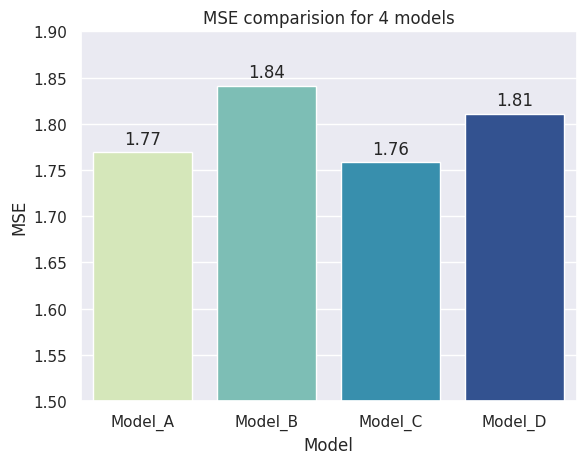

In [209]:
mse_plot = sns.barplot(data=evaluation, x='Model', y='MSE', palette='YlGnBu')
mse_plot.set_ylim(1.5, 1.9)
mse_plot.set_title('MSE comparision for 4 models')

for bars in mse_plot.patches:
    height = bars.get_height()
    mse_plot.annotate(f'{height:.2f}',
                xy=(bars.get_x() + bars.get_width() / 2., height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

<ipython-input-210-c1015c431f86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Rmse_plot = sns.barplot(data=evaluation, x='Model', y='R MSE', palette='YlGnBu')


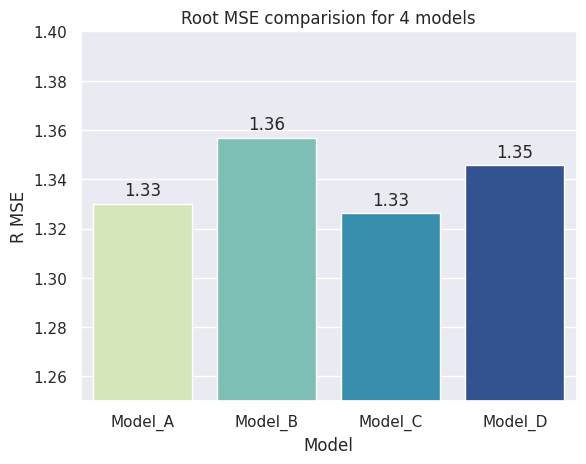

In [210]:
Rmse_plot = sns.barplot(data=evaluation, x='Model', y='R MSE', palette='YlGnBu')
Rmse_plot.set_ylim(1.25, 1.4)
Rmse_plot.set_title('Root MSE comparision for 4 models')

for bars in Rmse_plot.patches:
    height = bars.get_height()
    Rmse_plot.annotate(f'{height:.2f}',
                xy=(bars.get_x() + bars.get_width() / 2., height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

Explaination:


Based on the comparisons between MSE and RMSE of 4 models, Model C performs the best with the lowest MSE of 1.758898, which also corresponds to the lowest RMSE of 1.326234. Model A is the second best, followed closely by Model D, and Model B has the highest MSE and RMSE, making it the least accurate model among the four according to these metrics.

However, it's important to consider other factors like the complexity of the model, overfitting, and the nature of the data when making the final decision on model performance.


### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


**Answer:**

In the provided infographic, there are two tables showing the medal tally from the 2008 Summer Olympic Games, while the Table 1 is sorted by total medals, the Table 2 is sorted by gold medals. This can lead to the mislead viewers who might assume both tables reflect the same ranking method, potentially misinterpreting the performance of the countries listed. Moreover, while the sources for the data are cited at the bottom (Wolfe, 2015), (Hardaway, 2008), they are not consistent with the 2008 Olympic data, raising questions about the data's validity, which is consideres as the error in source credibility.

In conclusion, each of these concerns could lead to misinterpretation of the data presented. Ethical data visualisation should follow the principles of accuracy, clarity, fairness and privacy for how the viewers will interpret the visual cues, ensuring the information is accessible and non-deceptive.